## Flow plotting for the dynamical systems of MSD

In [1]:
from qiskit import quantum_info as qi
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from utils import get_poly_from_code, poly_dicts_to_sympy, get_stabilizer_code

In [2]:
## Input your stabilizer code here.
code_name = '7_Steane'
generator_set, logical_operator = get_stabilizer_code('7_Steane')


x,y,z=sp.symbols('x y z', real= True)
poly_dicts = get_poly_from_code(generator_set=generator_set, logical_operator=logical_operator)
psuc_sp, Tx_sp, Ty_sp, Tz_sp = poly_dicts_to_sympy(poly_dicts)


## Print the full dynamic system
print("psuc: ", psuc_sp)
print("Tx: ", Tx_sp)
print("Ty: ", Ty_sp)
print("Tz: ", Tz_sp)




psuc:  7*x**4 - 42*x**2*y**2*z**2 + 7*y**4 + 7*z**4 + 1
Tx:  (x**7 + 7*x**3*y**4 + 7*x**3*z**4 + 7*x**3 - 42*x*y**2*z**2)/(7*x**4 - 42*x**2*y**2*z**2 + 7*y**4 + 7*z**4 + 1)
Ty:  (7*x**4*y**3 - 42*x**2*y*z**2 + y**7 + 7*y**3*z**4 + 7*y**3)/(7*x**4 - 42*x**2*y**2*z**2 + 7*y**4 + 7*z**4 + 1)
Tz:  (7*x**4*z**3 - 42*x**2*y**2*z + 7*y**4*z**3 + z**7 + 7*z**3)/(7*x**4 - 42*x**2*y**2*z**2 + 7*y**4 + 7*z**4 + 1)


In [3]:
## Reduce the dynamical system for z=0
psuc_sp = psuc_sp.subs({z:0})
Tx_sp = Tx_sp.subs({z:0})
Ty_sp = Ty_sp.subs({z:0})
Tz_sp = Tz_sp.subs({z:0})

print("psuc: ", psuc_sp)
print("Tx: ", Tx_sp)
print("Ty: ", Ty_sp)
print("Tz: ", Tz_sp)

psuc:  7*x**4 + 7*y**4 + 1
Tx:  (x**7 + 7*x**3*y**4 + 7*x**3)/(7*x**4 + 7*y**4 + 1)
Ty:  (7*x**4*y**3 + y**7 + 7*y**3)/(7*x**4 + 7*y**4 + 1)
Tz:  0


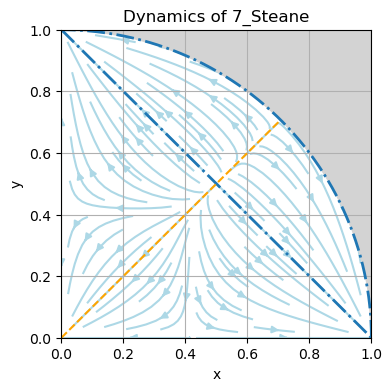

In [4]:
Tx = sp.lambdify(['x','y'], Tx_sp)
Ty = sp.lambdify(['x','y'], Ty_sp)

def vector_field(x,y):
    x_out, y_out = Tx(x,y), Ty(x,y)
    return x_out-x, y_out-y


x=np.linspace(0,1,50)
y=np.linspace(0,1,50)
X, Y = np.meshgrid(x, y)
U, V = vector_field(X, Y)

fig, ax = plt.subplots(figsize=(4,4))
ax.streamplot(X, Y, U, V, broken_streamlines=True, color='lightblue',zorder=0)
t=np.linspace(0,np.pi/2, 1000)
ax.plot(np.cos(t),np.sin(t),'-.',linewidth=2,color='C0')
ax.plot(np.linspace(0,1,100), 1-np.linspace(0,1,100),'-.',linewidth=2, color='C0')
ax.fill_between(np.linspace(0, 1, 100), [np.sqrt(1-x**2) for x in np.linspace(0, 1, 100)], 1, interpolate=False,color='lightgrey')
ax.plot(np.linspace(0,1/np.sqrt(2),100), np.linspace(0,1/np.sqrt(2),100),'--',color='orange')
#plt.plot(np.linspace(0,np.cos(np.pi/8),100), np.linspace(0,np.sin(np.pi/8),100),'--', color='C4')
#plt.plot(np.linspace(0,np.cos(np.pi*3/8),100), np.linspace(0,np.sin(np.pi*3/8),100),'--', color='C4')
ax.set_xlabel('x')
ax.set_ylabel('y')
#ax.set_title('β=1')
ax.set_title('Dynamics of '+str(code_name))
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
plt.ylim([0, 1])
plt.xlim([0, 1])
ax.grid()


## Plotting the input-output error under depolarizing channel

Text(0.5, 1.0, 'success rate')

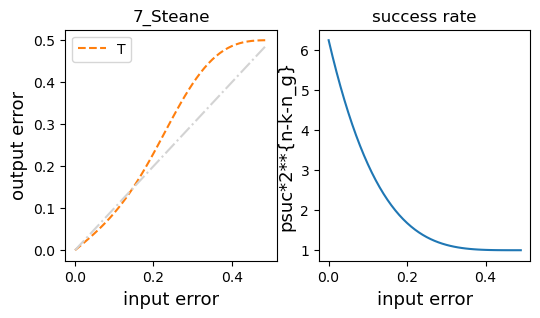

In [5]:
## Plotting the input-output error under depolarizing channel

psuc = sp.lambdify(['x','y'], psuc_sp)

e_list = np.arange(0,0.5,0.01)
e_out_list = []
e_out_eight = []
p_out = []
for e in e_list:
    x_input, y_input = 1/np.sqrt(2)*(1-2*e), 1/np.sqrt(2)*(1-2*e)
    x_out = Tx(x_input, y_input)
    y_out = Ty(x_input, y_input)

    e_out = (1 - (x_out+y_out) * 1/np.sqrt(2)) * 0.5
    e_out_list.append(e_out)

    x_input, y_input = np.cos(np.pi/8)*(1-2*e), np.sin(np.pi/8)*(1-2*e)
    x_out = Tx(x_input, y_input)
    y_out = Ty(x_input, y_input)

    e_out_eight.append((1 - x_out * np.cos(np.pi/8) - y_out * np.sin(np.pi/8)) * 0.5)
    p_out.append(psuc(x_input, y_input))

fig, axs = plt.subplots(1,2,figsize=(6,3))
axs[0].plot(e_list, e_out_list,'--',color='C1',label='T')
#plt.plot(e_list, e_out_eight,'--',color='C4',label='sqrt(T)')
axs[0].plot(e_list, e_list,'-.',color='lightgrey')
axs[0].legend()
axs[0].set_xlabel('input error',fontsize=13)
axs[0].set_ylabel('output error',fontsize=13)
axs[0].set_title(code_name)

axs[1].plot(e_list,p_out)
axs[1].set_ylabel('psuc*2**{n-k-n_g}',fontsize=13)
axs[1].set_xlabel('input error',fontsize=13)
axs[1].set_title('success rate')
